In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

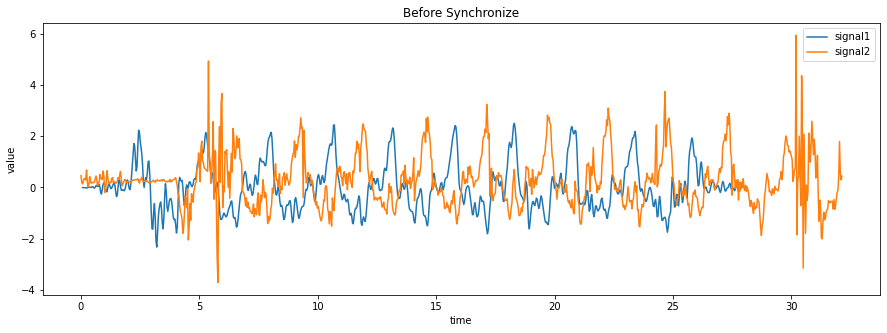

In [9]:
signal1 = pd.read_csv('/content/signal1.csv')
signal2 = pd.read_csv('/content/signal2.csv')


plt.figure(figsize=(15,5))
plt.plot(signal1['time'], signal1['value'], label = 'signal1')
plt.plot(signal2['time'], signal2['value'], label = 'signal2')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Before Synchronize')
plt.legend()
plt.show()



In [10]:
# 두 신호간의 MSE가 가장 작은 값일 때, Sync가 맞다고 말할 수 있다. 
# 길이가 짧은 데이터의 timestep을 1씩 옮겨가며 min MSE를 찾는다.

# 세 가지 case가 존재한다.
# case1)    short의 시점 < long의 시점 인 지점에 sync가 맞는 지점이 존재할 때
# case2)    short의 시점 >= long의 시점  and  short의 종점 <= long의 종점 인 지점에 sync가 맞는 지점이 존재할 때
# case3)    short의 종점 > long의 종점 인 지점에 sync가 맞는 지점이 존재할 때

# future work (시간 복잡도를 낮출 알고리즘이 반드시 존재) ex) (a-b)^2 = a^2 -2ab + b^2

In [11]:
min_mse = 99999999  # INT_MAX
min_i = 0


if len(signal1) > len(signal2): # signal1이 더 길 떄
    long = signal1
    short = signal2    
else:                   # signal2이 더 길 때
    long = signal2
    short = signal1    

p = len(short)//3 # 최대 이동 횟수 
# 측정 시기가 크게 차이나지 않는다면 경험적으로 p만큼 반복했을 때 값을 얻을 수 있었음.

q = len(long) - len(short) # 길이 차이


# case1) short가 long 왼쪽에 있을 때
for k in range(-p, 0):  
    error = 0
    for i in range(len(short)+k):
        diff = np.sqrt( ( long['value'][i] - short['value'][i-k])**2)        
        error += diff    
    print("k=", k, "error=", error)            
    mse = error / (len(short) + k)
    if mse < min_mse:
        min_mse = mse
        min_i = k

# case2) short가 long 사이에 있을 때
for k in range(0, q):  
    error = 0
    for i in range(len(short)):
        diff = np.sqrt( ( long['value'][i+k] - short['value'][i])**2)
        error += diff
    print("k=", k, "error=", error)            
    mse = error / len(short)
    if mse < min_mse:
        min_mse = mse
        min_i = k

# case3) short가 long 오른쪽에 있을 때
for k in range(q, q+p):
    error = 0
    for i in range(len(short)-(k-q)):
        diff = np.sqrt( ( long['value'][i+k] - short['value'][i])**2)
        error += diff
    print("k=", k, "error=", error)            
    mse = error / (len(short) - (k-q))
    if mse < min_mse:
        min_mse = mse
        min_i = k

min_i

k= -278 error= 459.1353859780001
k= -277 error= 451.89543606599983
k= -276 error= 445.32908483600033
k= -275 error= 442.35089653000006
k= -274 error= 442.35657535599967
k= -273 error= 442.1129087459995
k= -272 error= 437.118224334
k= -271 error= 433.85185296799983
k= -270 error= 434.9382371760004
k= -269 error= 434.04415269599974
k= -268 error= 435.366115994
k= -267 error= 439.74770000200033
k= -266 error= 444.426999146
k= -265 error= 452.88704127200026
k= -264 error= 466.5580836000005
k= -263 error= 479.3040409379998
k= -262 error= 497.07995116400014
k= -261 error= 516.3408341539999
k= -260 error= 537.4902028580002
k= -259 error= 556.4870556680004
k= -258 error= 574.3401905759999
k= -257 error= 591.4465498519997
k= -256 error= 603.9723418220002
k= -255 error= 615.5875150720003
k= -254 error= 628.4902621259992
k= -253 error= 640.4894808640001
k= -252 error= 651.16673526
k= -251 error= 662.4666764800003
k= -250 error= 670.077416268
k= -249 error= 675.8236258279995
k= -248 error= 683.187

117

In [12]:
if k < 0 : # short 앞 부분을 자른다.
    sync_short = short[:][-min_i:]
    sync_long = long
    sync_short['time'] = (sync_short['time'] - sync_short['time'].min())
else :  # k > 0  # long 앞 부분을 자른다.
    sync_long = long[:][min_i:]
    sync_short = short
    sync_long['time'] = (sync_long['time'] - sync_long['time'].min())


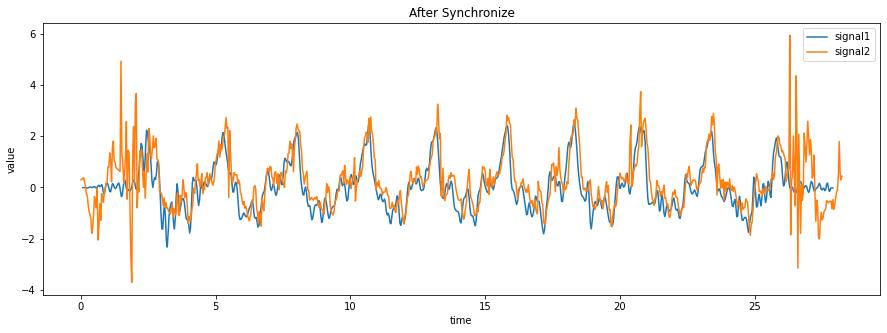

In [13]:
if len(signal1) > len(signal2): # 이전에 len(signal1) > len(signal2)
    signal1 = sync_long
    signal2 = sync_short
else:
    signal1 = sync_short
    signal2 = sync_long


plt.figure(figsize=(15,5))
plt.plot(signal1['time'], signal1['value'], label = 'signal1')
plt.plot(signal2['time'], signal2['value'], label = 'signal2')


plt.xlabel('time')
plt.ylabel('value')
plt.title('After Synchronize')
plt.legend()
plt.show()